Importamos las librearías necesarias.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Cargamos el dataset

In [52]:
# Cargar el dataset
df = pd.read_csv('Data/E3_database.csv')

Hacemos una exploración basica de los datos.

In [53]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170730 entries, 0 to 170729
Data columns (total 69 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   170730 non-null  int64  
 1   Class                170730 non-null  int64  
 2   relabeledClassArray  170730 non-null  int64  
 3   Finger_1             170730 non-null  float64
 4   Finger_2             170730 non-null  float64
 5   Finger_3             170730 non-null  float64
 6   Finger_4             170730 non-null  float64
 7   Finger_5             170730 non-null  float64
 8   Finger_6             170730 non-null  float64
 9   MAVs_1               170730 non-null  float64
 10  MAVs_2               170730 non-null  float64
 11  MAVs_3               170730 non-null  float64
 12  MAVs_4               170730 non-null  float64
 13  MAVs_5               170730 non-null  float64
 14  MAVs_6               170730 non-null  float64
 15  MAVs_7           

,Id,Class,relabeledClassArray,Finger_1,Finger_2,Finger_3,Finger_4,Finger_5,Finger_6,MAVs_1,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
count,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,...,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000,170730.000000
mean,20.494406,28.252100,2.510689,1.062388,1.096702,1.576717,2.123781,1.074548,1.857276,0.000024,...,0.001360,0.000829,0.000397,0.000425,0.001517,0.001785,0.001062,0.001144,0.000299,0.000484
std,11.544806,21.847711,2.814777,2.025730,2.289910,2.805901,3.834588,2.561105,4.343873,0.000042,...,0.001916,0.001315,0.000285,0.000789,0.003710,0.002080,0.001502,0.001266,0.000157,0.000443
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012599,0.000000,0.000001,...,0.000152,0.000138,0.000158,0.000027,0.000181,0.000032,0.000163,0.000171,0.000166,0.000175
25%,10.000000,0.000000,0.000000,0.323886,0.209476,0.508630,0.548404,0.168973,0.243274,0.000007,...,0.000319,0.000277,0.000257,0.000258,0.000353,0.000567,0.000303,0.000460,0.000247,0.000295
50%,20.000000,42.000000,1.000000,0.585936,0.406598,0.860712,1.084136,0.365467,0.531972,0.000014,...,0.000621,0.000415,0.000309,0.000319,0.000553,0.001160,0.000461,0.000785,0.000270,0.000354
75%,30.000000,46.000000,5.000000,0.884040,0.806845,1.406923,1.693483,0.776862,1.250020,0.000028,...,0.001590,0.000858,0.000428,0.000476,0.001064,0.002173,0.001173,0.001308,0.000297,0.000509
max,40.000000,49.000000,8.000000,27.420740,27.832260,40.428470,49.027610,38.005250,64.800750,0.001574,...,0.029278,0.030316,0.010680,0.046482,0.123386,0.050050,0.028351,0.033585,0.002408,0.008123


Eliminamos filas con valores atipicos.

In [54]:
from scipy import stats

def detect_outliers_z_score(df, threshold=5):
    # Ignorar las columnas de id y clases
    df_numeric = df.iloc[:, 2:]
    
    # Calcular Z-Scores
    z_scores = np.abs(stats.zscore(df_numeric))
    
    # Detectar valores atípicos
    outliers = (z_scores > threshold).any(axis=1)
    
    return df[outliers]

# Aplicar la función con un umbral de Z-Score alto (8)
outliers_df = detect_outliers_z_score(df, threshold=8)

# Mostrar el número de filas con valores atípicos
print(f'Número de filas con valores atípicos: {outliers_df.shape[0]}')

# Mostrar las primeras filas de los valores atípicos
print(outliers_df.head())


Número de filas con valores atípicos: 7040
    Id  Class  relabeledClassArray  Finger_1  Finger_2  Finger_3  Finger_4  \
26   1      0                    0  10.60376  0.433808  1.552699  1.709365   
37   1     41                    0  10.06078  0.507100  1.563277  2.039387   
45   1     41                    0  10.27164  0.421863  1.648202  2.158592   
47   1     41                    0  10.06656  0.484093  1.651046  2.235958   
73   1     41                    0  10.52315  0.723786  1.671758  2.348484   

    Finger_5  Finger_6    MAVs_1  ...      WL_3      WL_4      WL_5      WL_6  \
26  0.277199  1.564101  0.000022  ...  0.003092  0.001984  0.000389  0.000329   
37  0.273416  1.459127  0.000019  ...  0.003480  0.002090  0.000459  0.000334   
45  0.347320  1.419900  0.000017  ...  0.003390  0.001978  0.000469  0.000330   
47  0.441501  1.391815  0.000016  ...  0.003115  0.001884  0.000508  0.000338   
73  0.390893  1.248770  0.000011  ...  0.003343  0.002424  0.000443  0.000303   

 

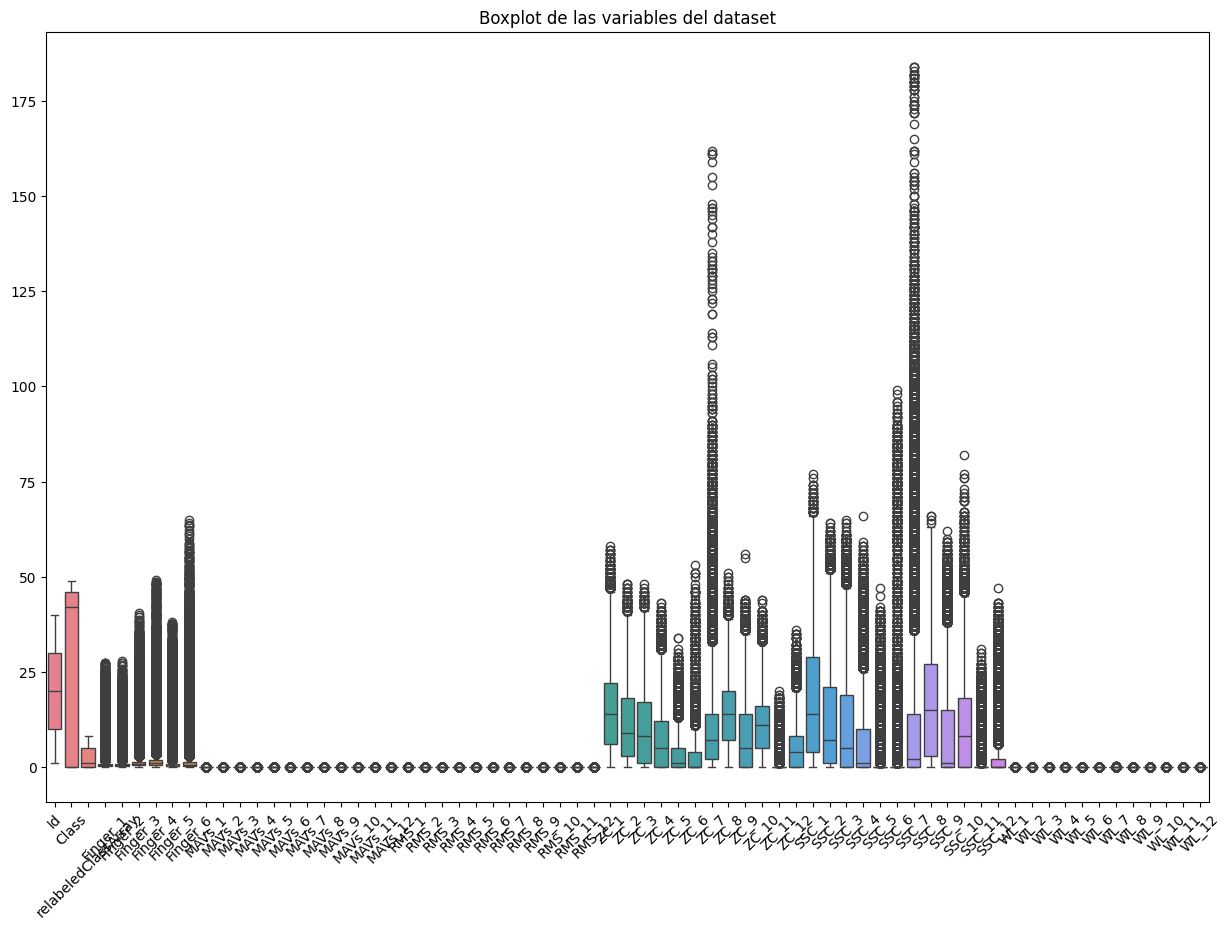

In [55]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot de las variables del dataset')
plt.xticks(rotation=45)
plt.show()


In [56]:
#Eliminar los valores atípicos
df_cleaned = df[~df.index.isin(outliers_df.index)]

Creamos un mapa de calor para ver la correlación entre las variables.

Text(0.5, 1.0, 'Mapa de calor de correlación')

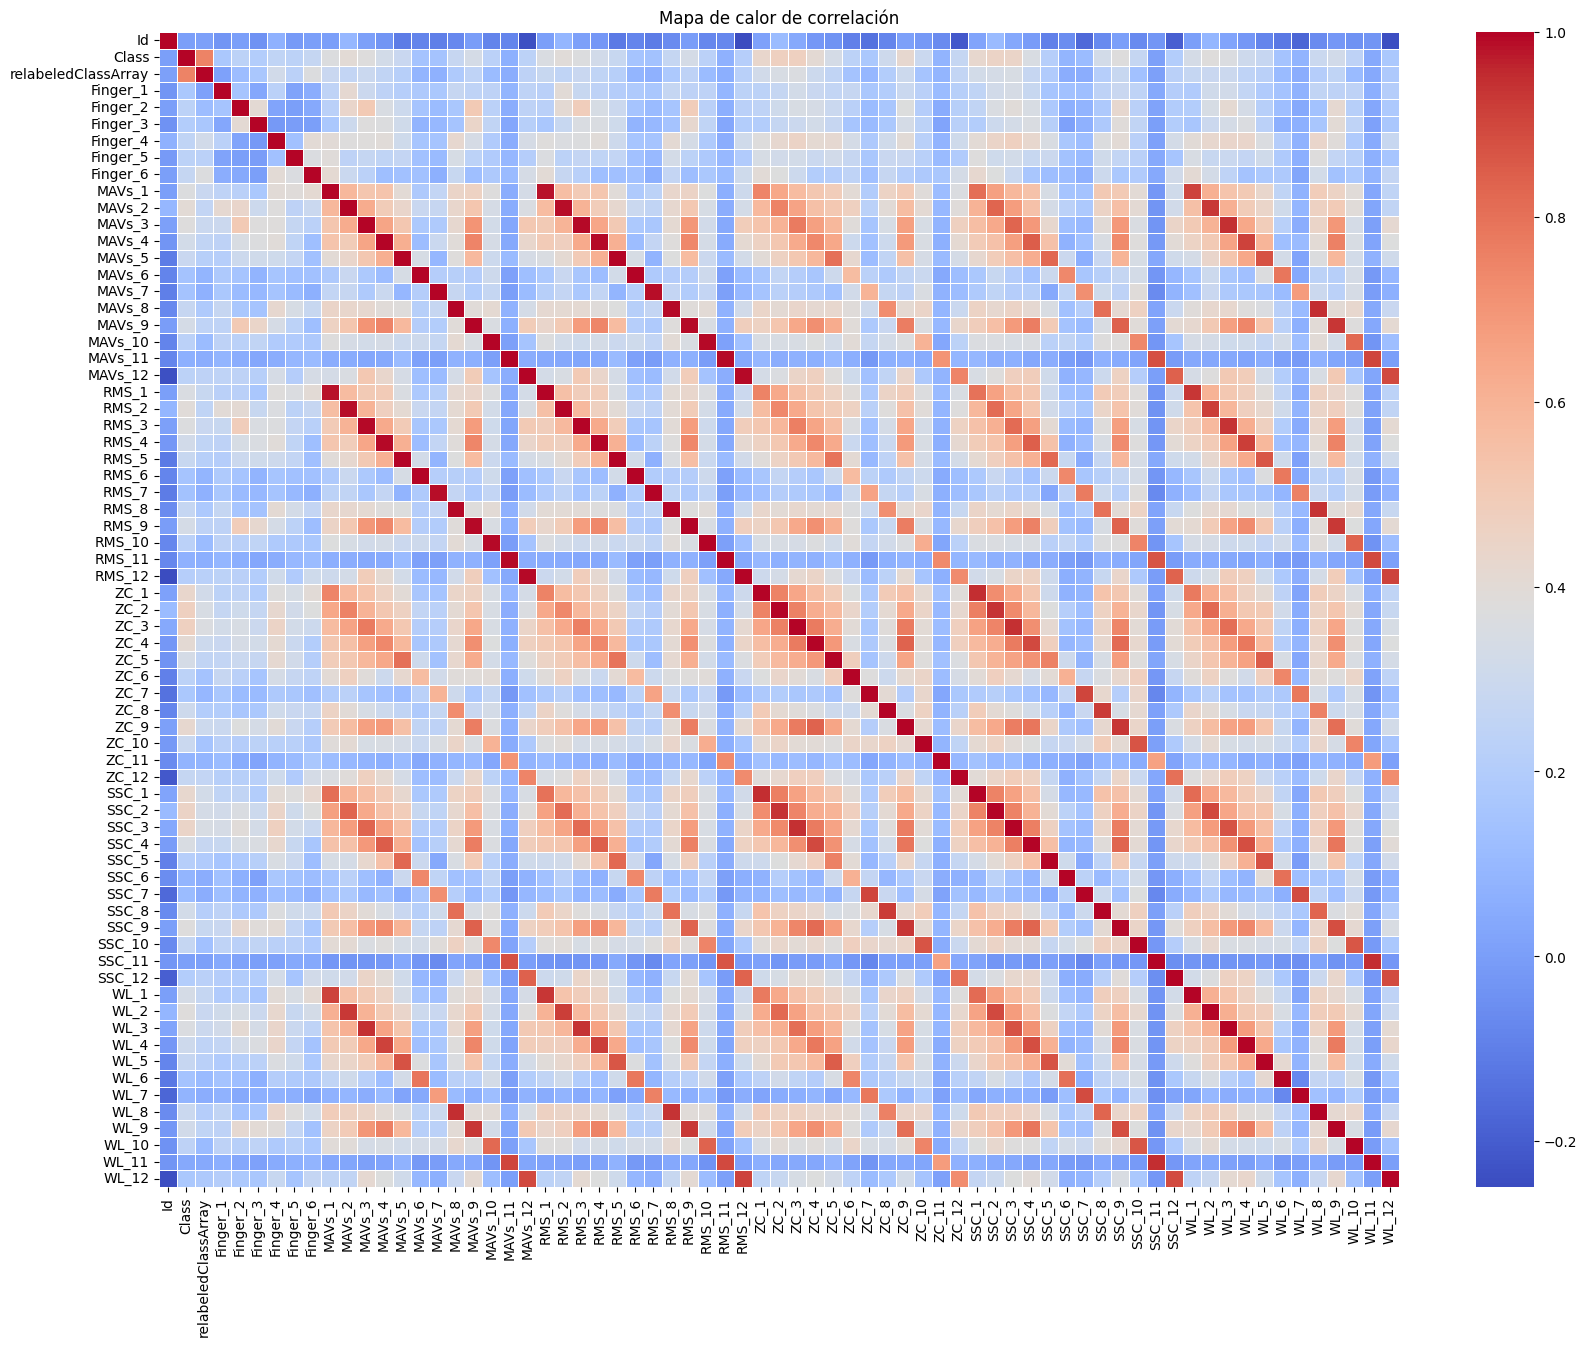

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cleaned.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación')

Creamos un mapa de calor entre subgrupos de variables

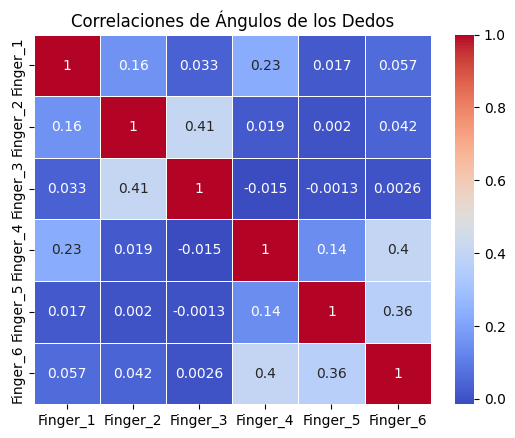

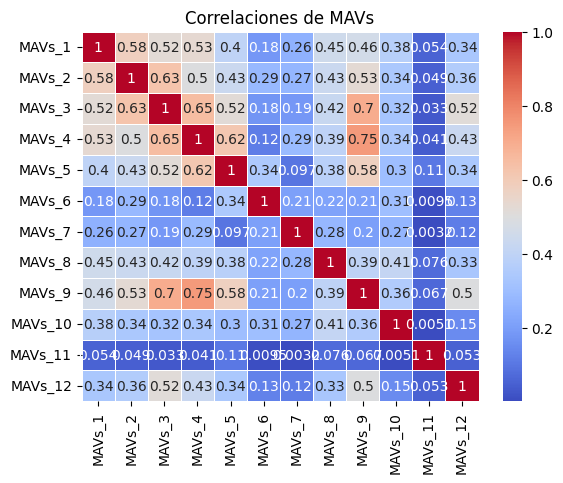

In [58]:
# Grupo de ángulos de los dedos
angles_columns = df_cleaned.columns[3:9]

# Grupo de MAVs
mavs_columns = df_cleaned.columns[9:21]

# Visualización para cada grupo
sns.heatmap(df_cleaned[angles_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlaciones de Ángulos de los Dedos')
plt.show()

sns.heatmap(df_cleaned[mavs_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlaciones de MAVs')
plt.show()


Visualizamos histogramas por subgrupos de variables.

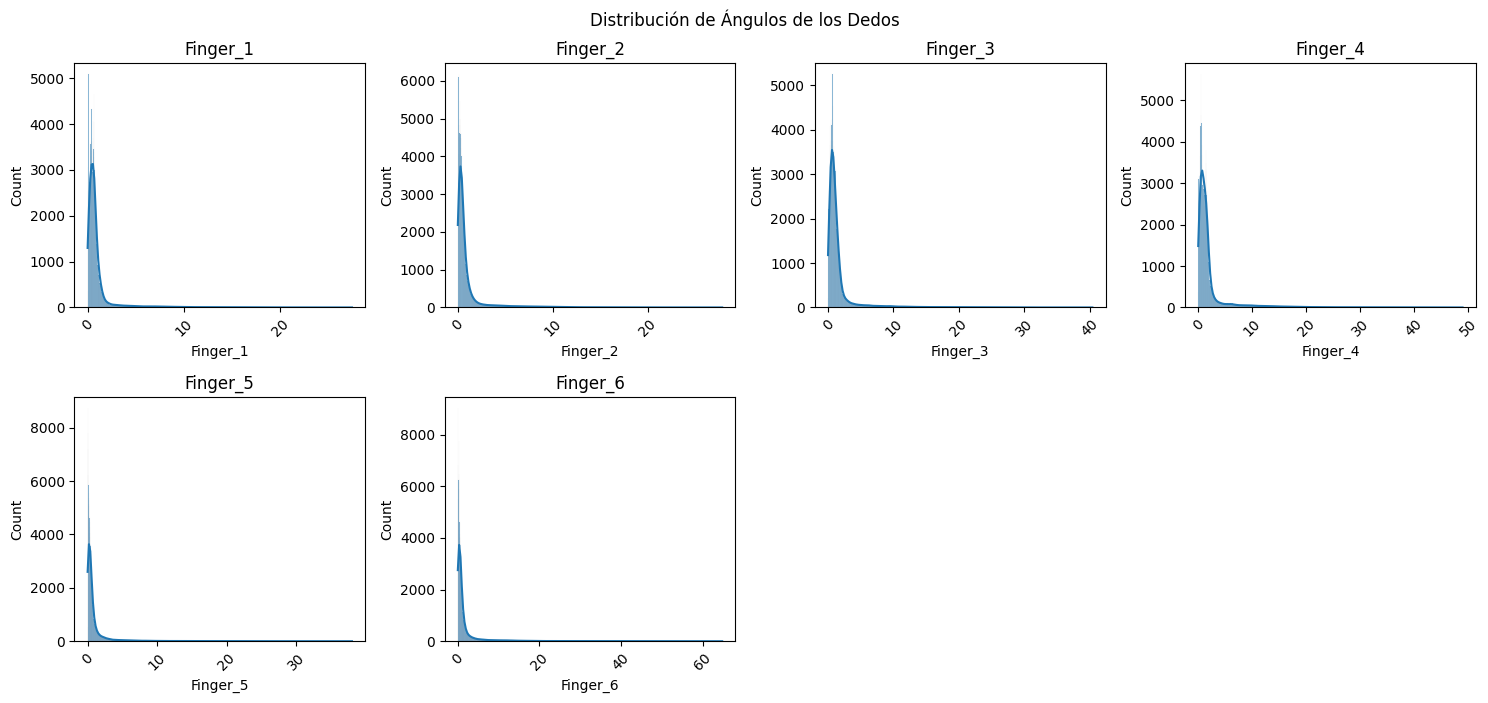

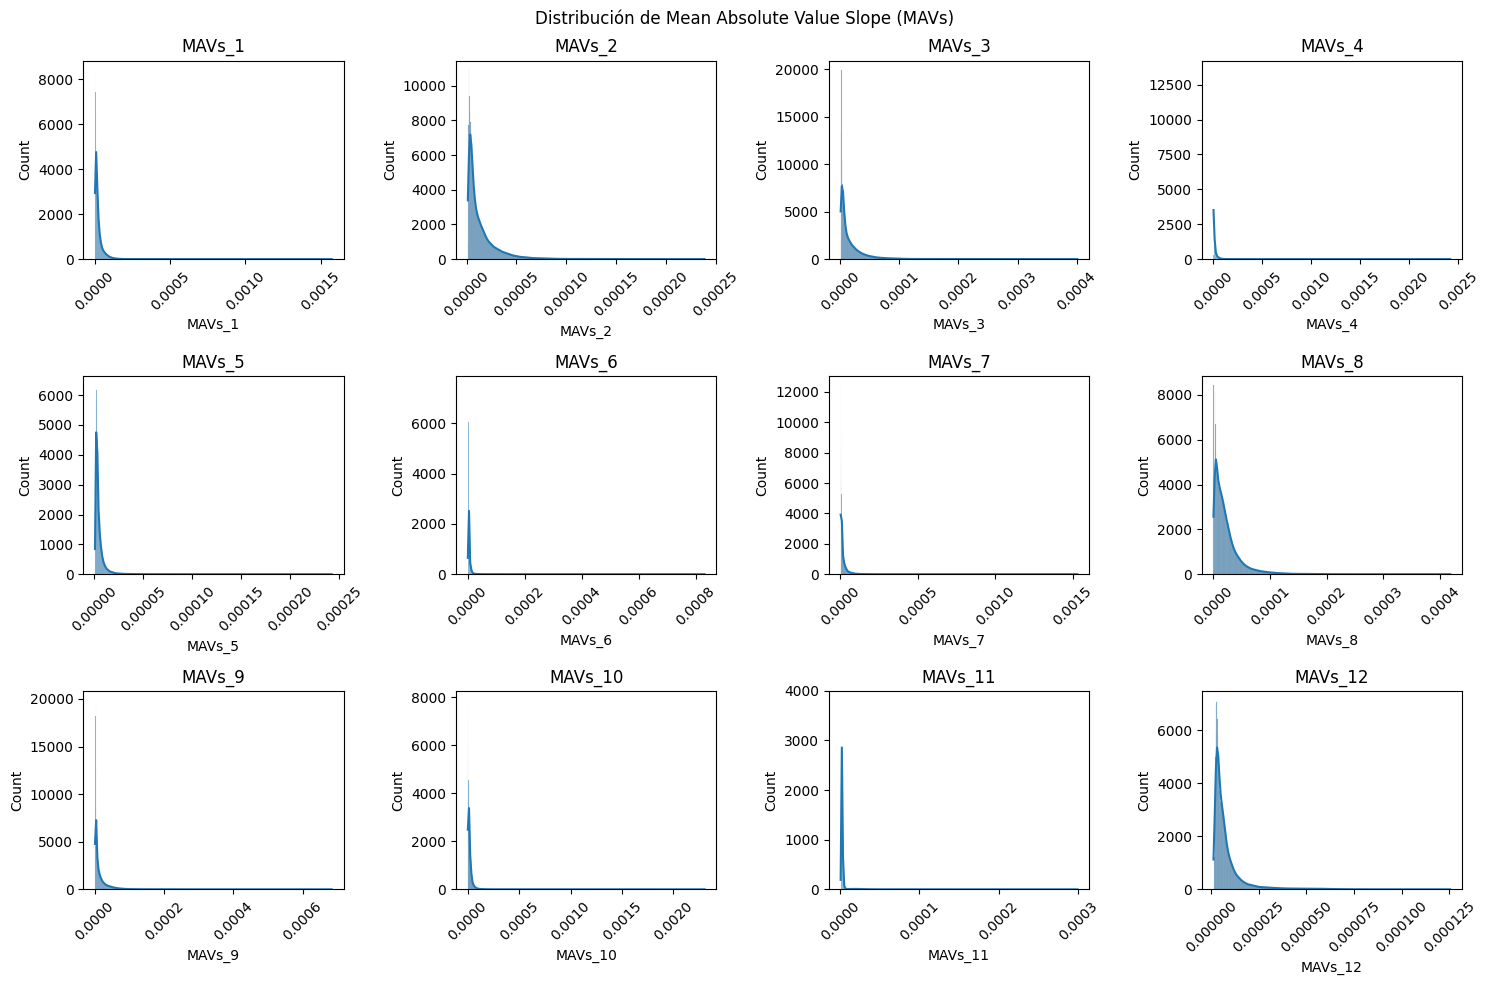

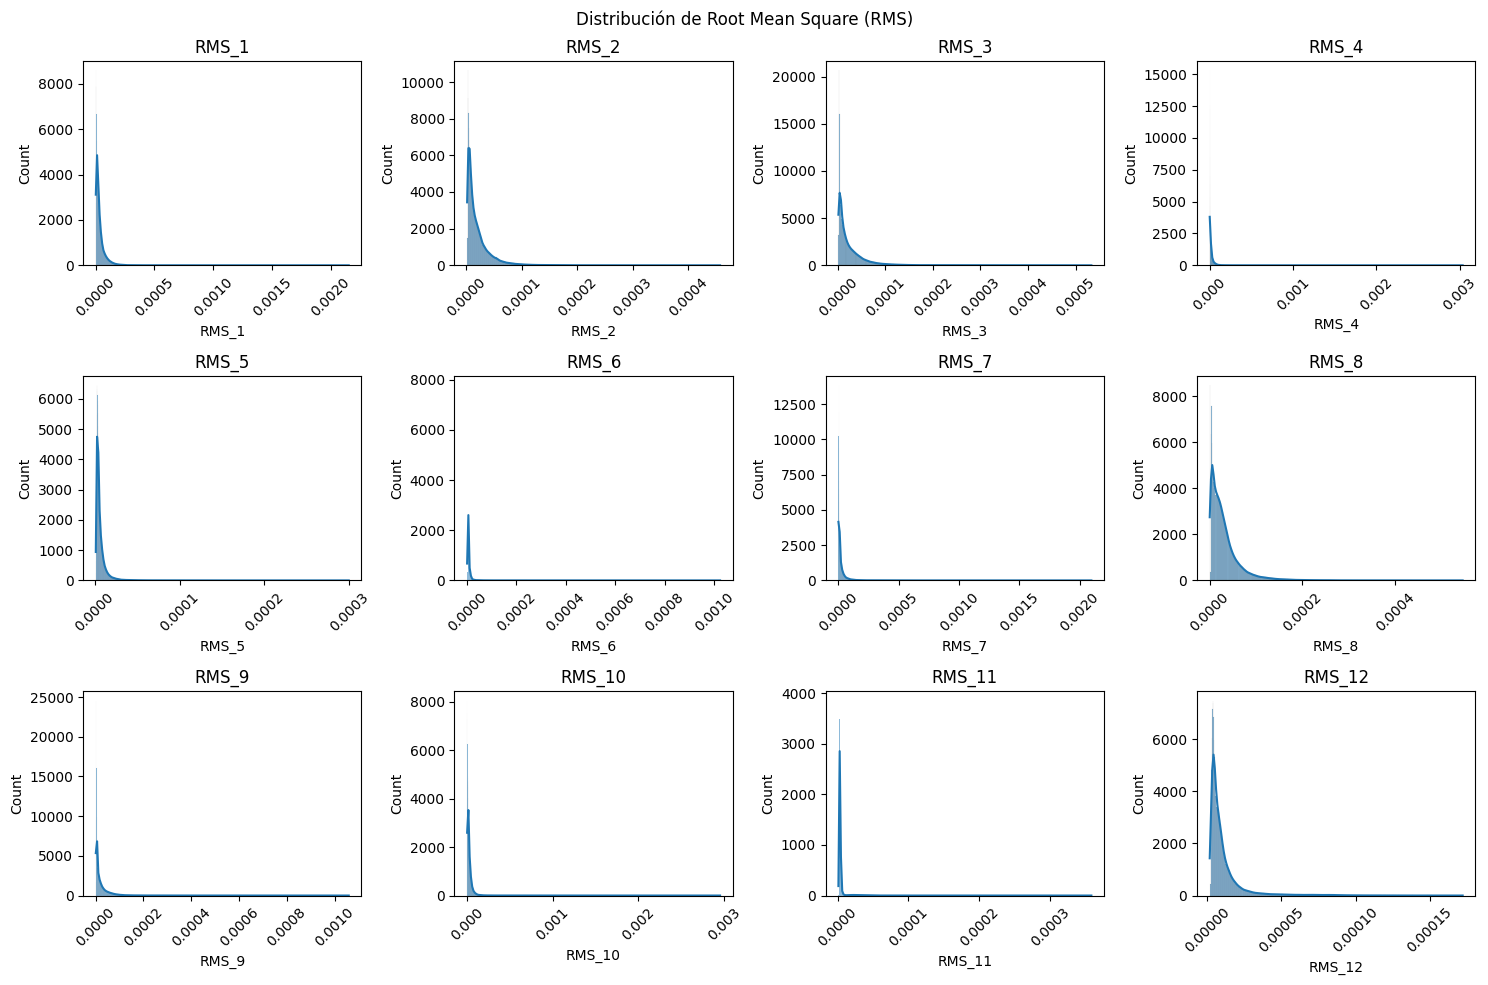

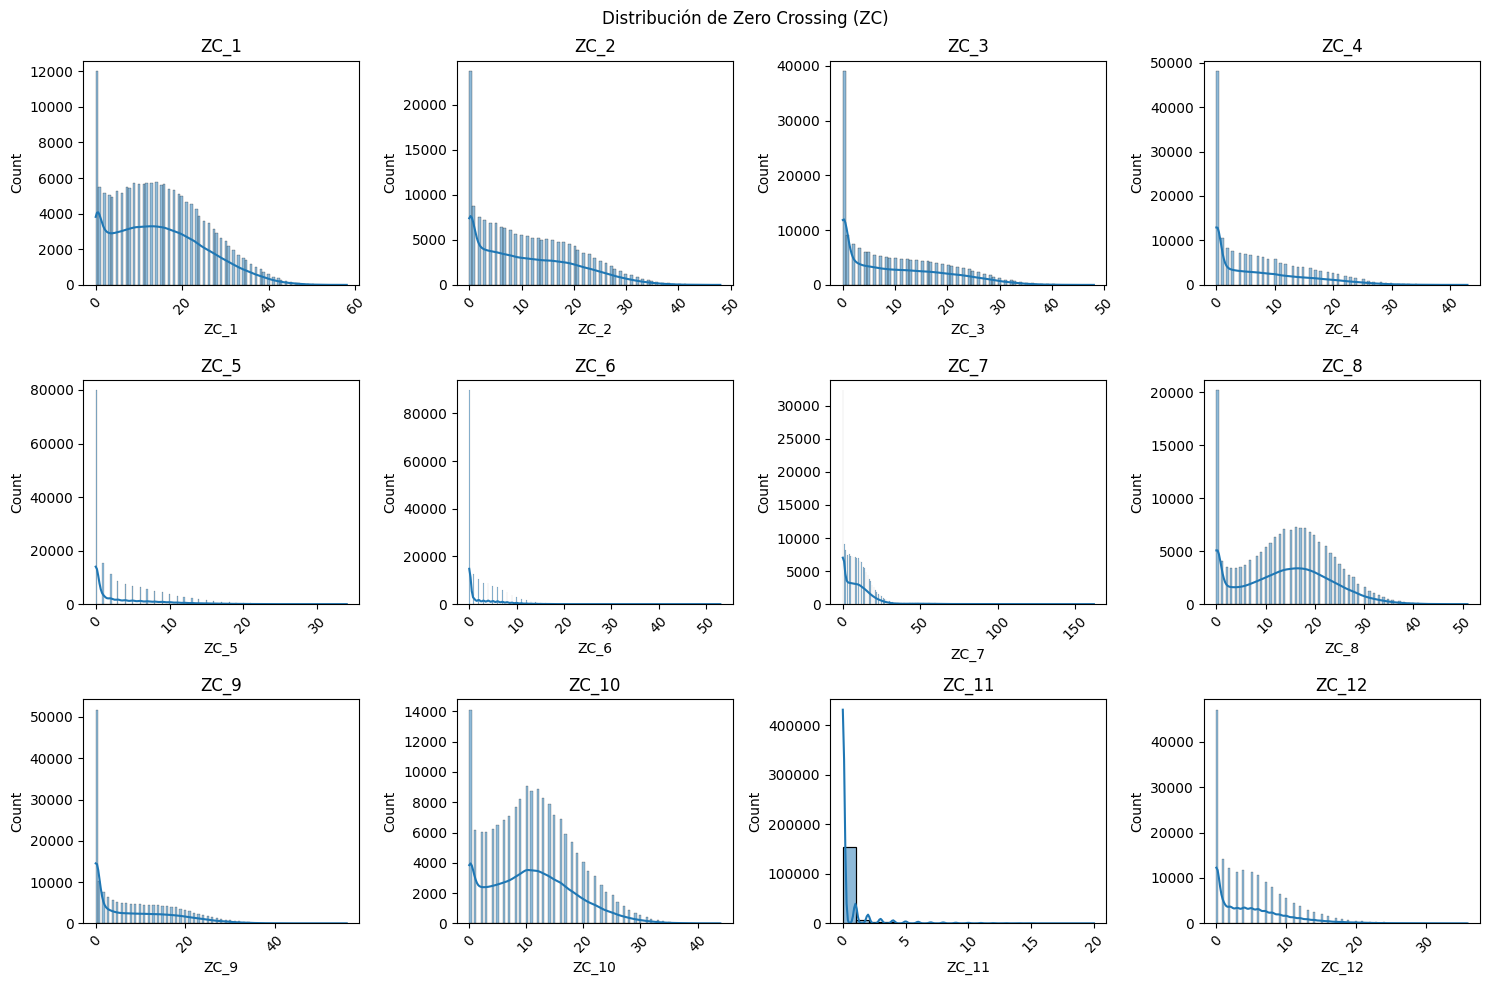

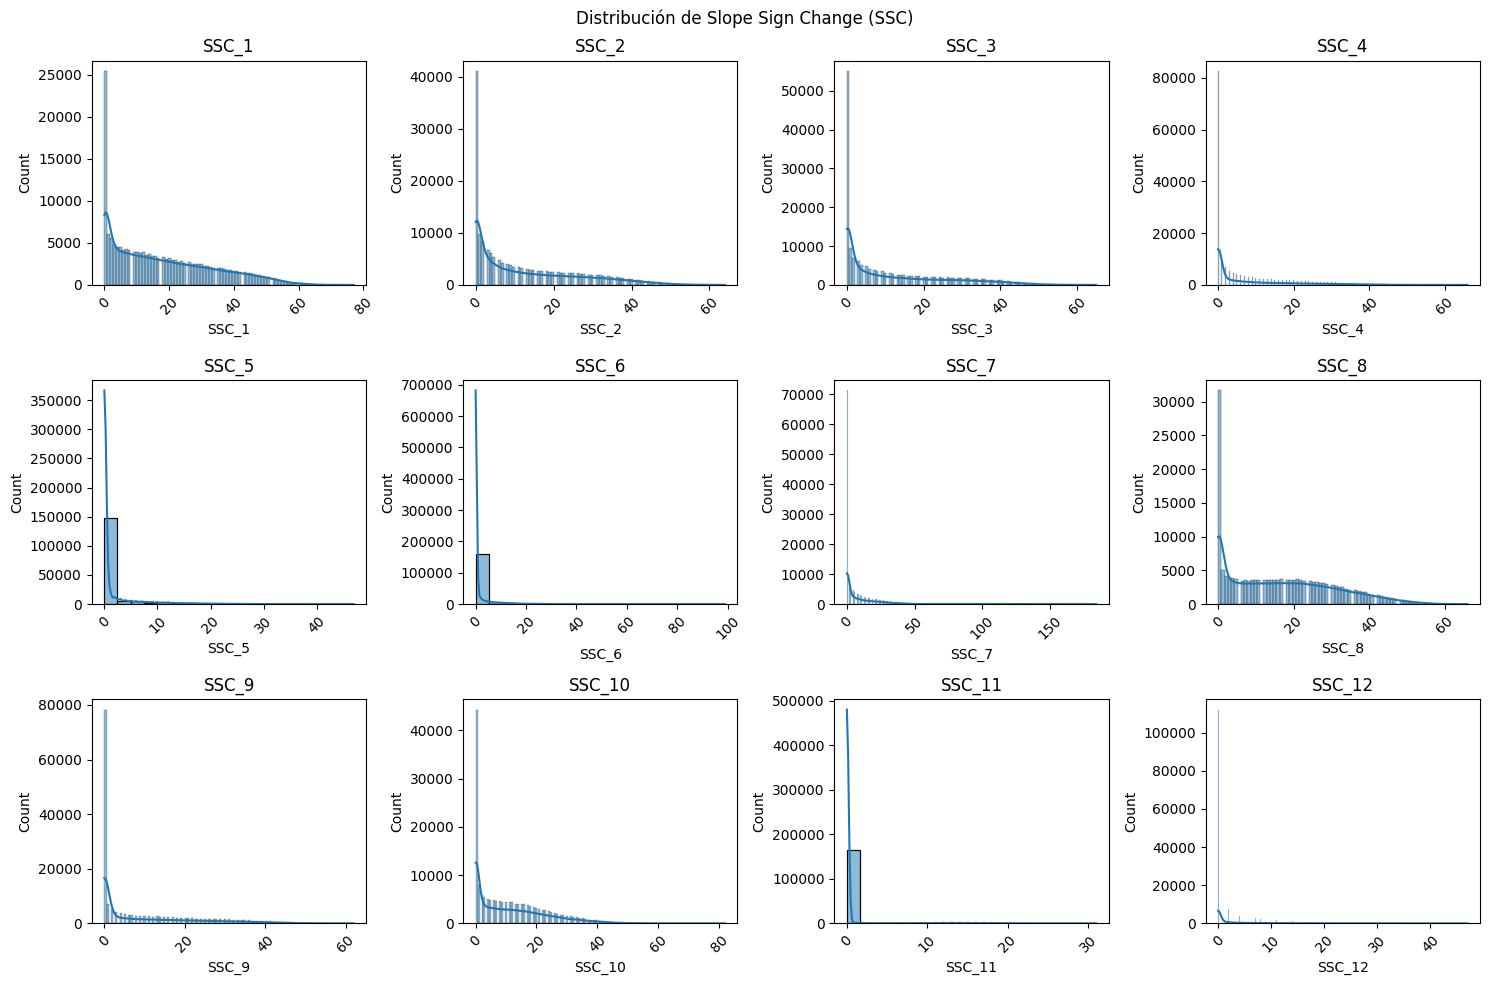

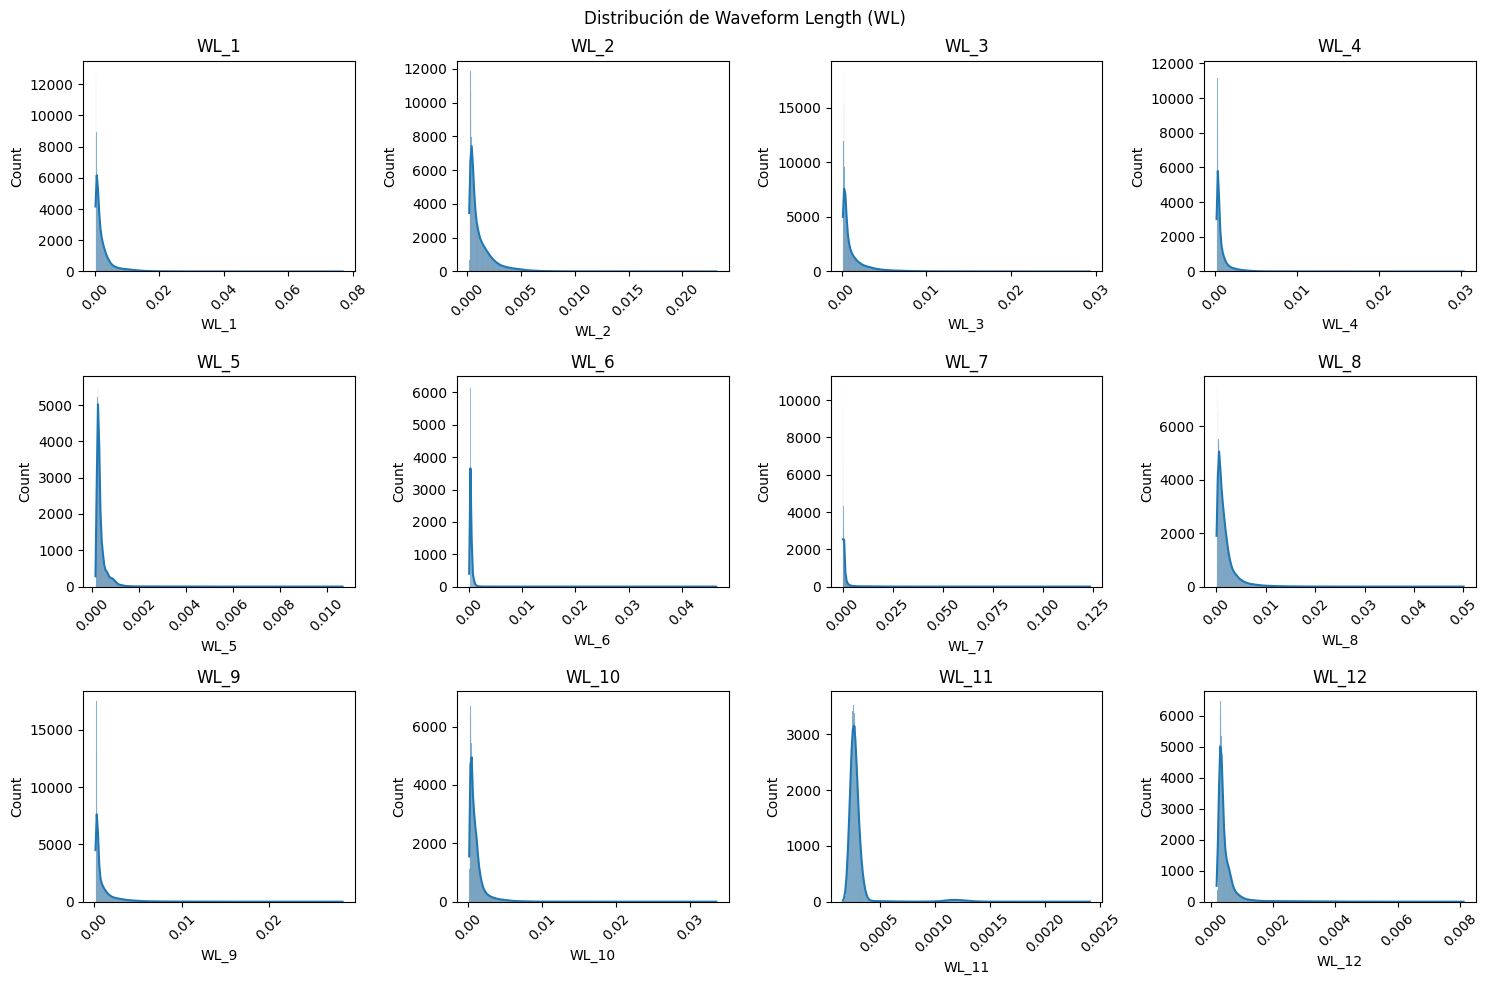

In [59]:
# Definir grupos de columnas
angles_columns = df_cleaned.columns[3:9]
mavs_columns = df_cleaned.columns[9:21]
rms_columns = df_cleaned.columns[21:33]
zc_columns = df_cleaned.columns[33:45]
ssc_columns = df_cleaned.columns[45:57]
wl_columns = df_cleaned.columns[57:69]

# Crear histogramas para cada grupo
def plot_histograms(columns, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns):
        plt.subplot(3, 4, i + 1)
        sns.histplot(df[column], kde=True)
        plt.title(column)
        plt.xticks(rotation=45)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_histograms(angles_columns, 'Distribución de Ángulos de los Dedos')
plot_histograms(mavs_columns, 'Distribución de Mean Absolute Value Slope (MAVs)')
plot_histograms(rms_columns, 'Distribución de Root Mean Square (RMS)')
plot_histograms(zc_columns, 'Distribución de Zero Crossing (ZC)')
plot_histograms(ssc_columns, 'Distribución de Slope Sign Change (SSC)')
plot_histograms(wl_columns, 'Distribución de Waveform Length (WL)')


Guardamos el dataset limpio.

In [60]:
folder_name = 'Data'
file_name = 'df_cleaned.csv'
file_path = os.path.join(folder_name, file_name)

# Verificar si la carpeta existe, si no, crearla
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Verificar si el archivo ya existe
if not os.path.isfile(file_path):
    # Guardar el DataFrame en un nuevo archivo CSV
    df_cleaned.to_csv(file_path, index=False)
    print(f'Archivo {file_path} guardado exitosamente.')
else:
    print(f'El archivo {file_path} ya existe. No se guardó nada.')


El archivo Data\df_cleaned.csv ya existe. No se guardó nada.
